In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## KNN  
- non-parametric algorithm  
- lazy learning algorithm  

In [2]:
from heapq import nsmallest, nlargest

df = pd.read_csv("data.csv")


def euclidean(a, b):
    """Returns euclidean distance"""
    return (a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2


k = 3
new = (165, 5.5)
res = []
for obs in zip(df["weight"], df["sweetness"], df["label"]):
    res.append((euclidean(new, obs[:-1]), obs[-1]))
temp = [nsmallest(k, res)[i][1] for i in range(k)]
print(nlargest(1, temp, key=lambda x: temp.count(x))[0])

Apple


#### Question 1A

Test data: [[165.    5.5]]
The manhattan distance is [np.float64(16.5), np.float64(35.5), np.float64(16.5), np.float64(5.5), np.float64(5.5), np.float64(27.5)]
The minkowski distance is [np.float64(15.00037498593832), np.float64(35.00000036443148), np.float64(15.00037498593832), np.float64(5.000124995312773), np.float64(5.000124995312773), np.float64(25.000624976563866)]
The euclidian distance is [15.074813431681335, 35.00357124637428, 15.074813431681335, 5.024937810560445, 5.024937810560445, 25.124689052802225]
Predicted class: ['Orange']


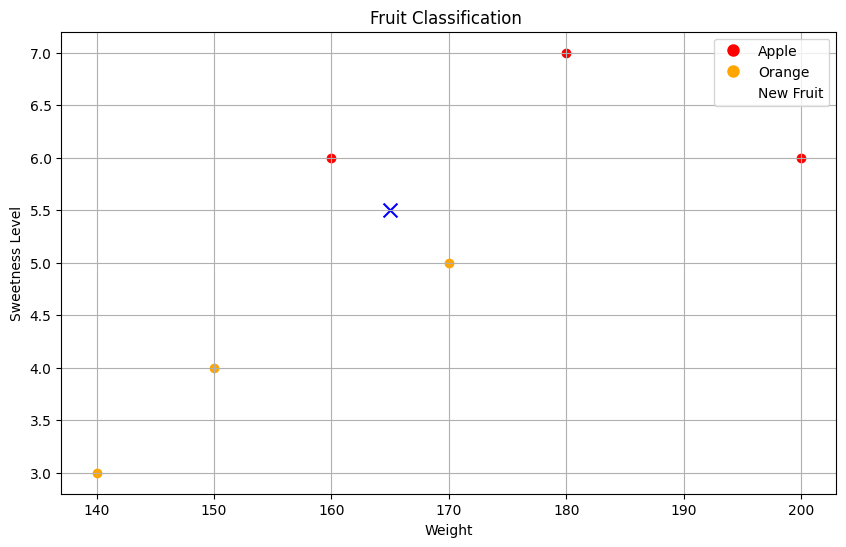

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from collections import Counter
import math


class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        # remember here fit only stores the data
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        # returns an array of the suitable labels for each data in the test set
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def euclidian_distance(self, x):
        distances = []
        for i in range(len(self.X_train)):
            distance = math.sqrt(
                (self.X_train[i][0] - x[0]) ** 2 + (self.X_train[i][1] - x[1]) ** 2
            )
            distances.append(distance)
        return distances

    def manhattan_distance(self, x):
        distances = []
        for i in range(len(self.X_train)):
            distance = abs(self.X_train[i][0] - x[0]) + abs(self.X_train[i][1] - x[1])
            distances.append(distance)
        return distances

    def minkowski_distance(self, x, p):
        distances = []
        for i in range(len(self.X_train)):
            distance = (
                (self.X_train[i][0] - x[0]) ** p + (self.X_train[i][1] - x[1]) ** p
            ) ** (1 / p)
            distances.append(distance)
        return distances

    def _predict(self, x):

        distances = self.manhattan_distance(x)
        print(f"The manhattan distance is {distances}")
        distances = self.minkowski_distance(x, 4)
        print(f"The minkowski distance is {distances}")
        distances = self.euclidian_distance(x)
        print(f"The euclidian distance is {distances}")
        # remember that argsort returns an array of the indices of the sorted features
        k_indices = np.argsort(distances)[: self.k]  # we take the top "k" elements
        k_nearest_labels = [
            self.y_train[i] for i in k_indices
        ]  # get an array of the labels of the top k points
        # returns the frequency map of the labels
        freq = Counter(k_nearest_labels)
        result = max(freq, key=lambda x: freq[x])
        return result

    def plot_fruits(self, dataset, new_fruit):
        plt.figure(figsize=(10, 6))
        for weight, sweetness, label in dataset.values:
            color = "red" if label == "Apple" else "orange"
            plt.scatter(weight, sweetness, color=color)

        plt.scatter(
            new_fruit[0][0],
            new_fruit[0][1],
            color="blue",
            marker="x",
            s=100,
            label="New Fruit",
        )

        plt.title("Fruit Classification ")
        plt.xlabel("Weight")
        plt.ylabel("Sweetness Level")

        handles = [
            Line2D(
                [0],
                [0],
                marker="o",
                color="w",
                label="Apple",
                markerfacecolor="red",
                markersize=10,
            ),
            Line2D(
                [0],
                [0],
                marker="o",
                color="w",
                label="Orange",
                markerfacecolor="orange",
                markersize=10,
            ),
            Line2D(
                [0],
                [0],
                marker="x",
                color="w",
                label="New Fruit",
                markerfacecolor="blue",
                markersize=10,
            ),
        ]
        plt.legend(handles=handles)
        plt.grid()
        plt.show()


if __name__ == "__main__":
    df = pd.read_csv("fruits.csv")

    X_train = df.iloc[:, 1:-1].values
    y_train = df.iloc[:, -1].values

    knn = KNN(k=3)
    knn.fit(X_train, y_train)

    X_test = np.array([[165, 5.5]])
    print("Test data:", X_test)

    predictions = knn.predict(X_test)
    print("Predicted class:", predictions)
    knn.plot_fruits(df.iloc[:, 1:], X_test)

#### Question 1B 

Predicted label for the new fruit using KNN (k=3): Apple


C:\Users\Arnav\AppData\Local\Temp\ipykernel_41532\3419371636.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.contourf(xx, yy, Z.reshape(xx.shape), alpha=0.2, cmap=plt.cm.get_cmap('RdYlBu'))


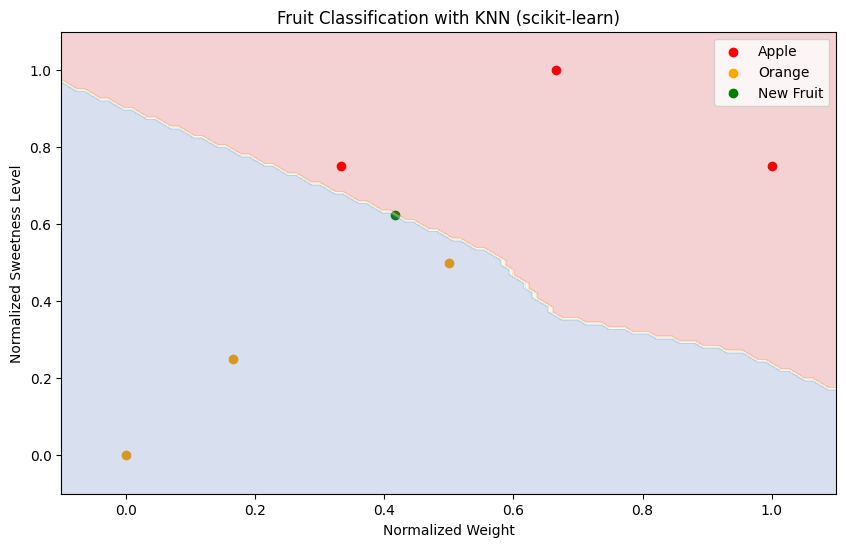

Euclidean Distances: [[0.45069391]
 [0.59657588]
 [0.45069391]
 [0.1502313 ]
 [0.1502313 ]
 [0.75115652]]
Manhattan Distances: [[0.625     ]
 [0.70833333]
 [0.625     ]
 [0.20833333]
 [0.20833333]
 [1.04166667]]
Minkowski Distances: [[0.45069391]
 [0.59657588]
 [0.45069391]
 [0.1502313 ]
 [0.1502313 ]
 [0.75115652]]


In [4]:
# using the scikit-learn library. Plot the given samples, using red for
# "Apple" and orange for "Orange." Also, plot the decision boundary. Calculate the distances using Euclidean,
# Manhattan, and Minkowski metrics, and compare the results.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances

# Example dataset
data = {
    "Weight": [180, 200, 150, 170, 160, 140],
    "Sweetness": [7, 6, 4, 5, 6, 3],
    "Label": ["Apple", "Apple", "Orange", "Orange", "Apple", "Orange"],
}

df = pd.DataFrame(data)
X = df[["Weight", "Sweetness"]].values
y = df["Label"].values

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Create and fit KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_normalized, np.array(y))

# 1. Classify a new fruit
new_fruit = np.array([[165, 5.5]])
new_fruit_normalized = scaler.transform(new_fruit)
knn_prediction = knn.predict(new_fruit_normalized)
print(f"Predicted label for the new fruit using KNN (k=3): {knn_prediction[0]}")

# 2. Plotting the samples
plt.figure(figsize=(10, 6))
# Scatter plot for Apples
plt.scatter(
    X_normalized[y == "Apple"][:, 0],
    X_normalized[y == "Apple"][:, 1],
    color="red",
    label="Apple",
)
# Scatter plot for Oranges
plt.scatter(
    X_normalized[y == "Orange"][:, 0],
    X_normalized[y == "Orange"][:, 1],
    color="orange",
    label="Orange",
)
# Scatter plot for the new fruit
plt.scatter(
    new_fruit_normalized[0][0],
    new_fruit_normalized[0][1],
    color="green",
    label="New Fruit",
)

# 3. Plot the decision boundary
x_min, x_max = X_normalized[:, 0].min() - 0.1, X_normalized[:, 0].max() + 0.1
y_min, y_max = X_normalized[:, 1].min() - 0.1, X_normalized[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict using KNN for the mesh grid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.where(
    Z == "Apple", 0, 1
)  # Convert labels to numerical values for contour plotting

plt.contourf(xx, yy, Z.reshape(xx.shape), alpha=0.2, cmap=plt.cm.get_cmap("RdYlBu"))

# Add title and labels
plt.title("Fruit Classification with KNN (scikit-learn)")
plt.xlabel("Normalized Weight")
plt.ylabel("Normalized Sweetness Level")
plt.legend()
plt.show()

# 4. Calculate distances
distances_euclidean = pairwise_distances(
    X_normalized, new_fruit_normalized, metric="euclidean"
)
print("Euclidean Distances:", distances_euclidean)

distances_manhattan = pairwise_distances(
    X_normalized, new_fruit_normalized, metric="manhattan"
)
print("Manhattan Distances:", distances_manhattan)

distances_minkowski = pairwise_distances(
    X_normalized, new_fruit_normalized, metric="minkowski"
)
print("Minkowski Distances:", distances_minkowski)

#### Question 2A

In [5]:
import numpy as np
import pandas as pd

# Sample dataset creation
data = {
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}
df = pd.DataFrame(data)


def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_value = -sum(
        (count / sum(counts)) * np.log2(count / sum(counts)) for count in counts
    )
    return entropy_value


def information_gain(data, split_col, target_col):
    total_entropy = entropy(data[target_col])
    values, counts = np.unique(data[split_col], return_counts=True)
    weighted_entropy = sum(
        (counts[i] / sum(counts))
        * entropy(data[data[split_col] == values[i]][target_col])
        for i in range(len(values))
    )
    return total_entropy - weighted_entropy


def build_decision_tree(data, target_col):
    if len(np.unique(data[target_col])) == 1:
        return data[target_col].values[0]
    if len(data.columns) == 1:
        return data[target_col].mode()[0]

    features = ["Blood Pressure", "Cholesterol"]
    tree = {}

    for feature in features:
        tree[feature] = {}
        for value in np.unique(data[feature]):
            subset = data[data[feature] == value]
            diagnosis = subset[target_col].mode()[0] if not subset.empty else "Unknown"
            tree[feature][value] = diagnosis

    return tree


decision_tree = build_decision_tree(df, "Diagnosis")


def predict(tree, sample):
    age = sample["Age"]
    blood_pressure = sample["Blood Pressure"]
    cholesterol = sample["Cholesterol"]

    if age > 60 and (blood_pressure == "High" or cholesterol == "High"):
        return "Sick"

    for feature in tree:
        feature_value = sample[feature]
        if feature_value in tree[feature]:
            return tree[feature][feature_value]

    return "Unknown"


# User input for new patient
age = int(input("Enter the patient's age: "))
blood_pressure = int(
    input("Enter the patient's blood pressure (1 for High, 0 for Low): ")
)
cholesterol = int(
    input("Enter the patient's cholesterol level (1 for High, 0 for Normal): ")
)

blood_pressure_label = "High" if blood_pressure == 1 else "Low"
cholesterol_label = "High" if cholesterol == 1 else "Normal"

new_patient = {
    "Age": age,
    "Blood Pressure": blood_pressure_label,
    "Cholesterol": cholesterol_label,
}
print(new_patient)  # Show input details

prediction = predict(decision_tree, new_patient)
print(f"Prediction for the new patient (Age: {age}): {prediction}")

{'Age': 45, 'Blood Pressure': 'High', 'Cholesterol': 'Normal'}
Prediction for the new patient (Age: 45): Sick


#### Question 2B

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
import warnings

warnings.filterwarnings("ignore")

# Sample dataset creation
data = {
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}

df = pd.DataFrame(data)

# Map categorical variables to numerical
df["Blood Pressure"] = df["Blood Pressure"].map({"High": 1, "Low": 0})
df["Cholesterol"] = df["Cholesterol"].map({"High": 1, "Normal": 0})
df["Diagnosis"] = df["Diagnosis"].map({"Sick": 1, "Healthy": 0})

# Features and target variable
X = df[["Age", "Blood Pressure", "Cholesterol"]]
y = df["Diagnosis"]

# Create and fit the decision tree classifier
tree_clf = DecisionTreeClassifier(criterion="entropy")
tree_clf.fit(X, y)

# Display the rules of the decision tree
tree_rules = export_text(tree_clf, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

# Prediction for a new patient
new_patient = [[50, 0, 0]]  # Age: 50, Blood Pressure: Low, Cholesterol: Normal
prediction = tree_clf.predict(new_patient)

# Output the diagnosis
diagnosis = "Healthy" if prediction[0] == 0 else "Sick"
print(
    f"The prediction for the new patient (Age: 50, Blood Pressure: Low, Cholesterol: Normal) is: {diagnosis}"
)

Decision Tree Rules:
 |--- Cholesterol <= 0.50
|   |--- class: 0
|--- Cholesterol >  0.50
|   |--- class: 1

The prediction for the new patient (Age: 50, Blood Pressure: Low, Cholesterol: Normal) is: Healthy
